<a href="https://colab.research.google.com/github/RodrigoEslava/USP-IQ-Biochemistry-Masters/blob/main/plot_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist, squareform

# Carregar os embeddings
file_path = '/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/grafos biogrid/Biogrid 2023/emb_sem_pesos_bio_2023_window20.txt'
with open(file_path, 'r') as f:
    lines = f.readlines()

# Pular a primeira linha
lines = lines[1:]

# Extrair dados dos embeddings
protein_ids = []
embeddings = []
for line in lines:
    parts = line.strip().split()
    if len(parts) > 1:
        protein_ids.append(parts[0])
        embeddings.append([float(x) for x in parts[1:]])

# Converter para numpy array
protein_embeddings = np.array(embeddings)
print(f"Carregado {protein_embeddings.shape[0]} embeddings com {protein_embeddings.shape[1]} dimensões.")

# Carregar dicionário de proteínas de dor
df_dicionario_dor = pd.read_csv('/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/dicionario_simbolo_id_dor.csv')

# Mostrar as primeiras linhas do dicionário de dor
print("Primeiras linhas do dicionário de dor:")
print(df_dicionario_dor.head())

# Carregar IDs e símbolos do dicionário de dor
pain_protein_ids = df_dicionario_dor['ID Correspondente'].astype(str).tolist()
pain_protein_symbols = df_dicionario_dor.set_index(df_dicionario_dor['ID Correspondente'].astype(str))['Alt ID'].to_dict()

# Verificar uma amostra de mapeamentos
print("Exemplo de mapeamento de símbolos de proteínas:")
for protein_id in pain_protein_ids[:5]:
    print(protein_id, pain_protein_symbols.get(protein_id, "Símbolo não encontrado"))

# Filtrar proteínas de dor presentes nos embeddings
pain_protein_indices = [protein_ids.index(id) for id in pain_protein_ids if id in protein_ids]
pain_protein_embeddings = protein_embeddings[pain_protein_indices]
pain_protein_names = [protein_ids[idx] for idx in pain_protein_indices]

# Calcular a similaridade de cosseno
cosine_sim_matrix = cosine_similarity(pain_protein_embeddings)

# Criar tabela de similaridades de cosseno > 0.5
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=pain_protein_names, columns=pain_protein_names)
cosine_sim_filtered_df = cosine_sim_df.where(cosine_sim_df > 0.5).stack().reset_index()
cosine_sim_filtered_df.columns = ['Protein1', 'Protein2', 'Cosine_Similarity']
cosine_sim_filtered_df = cosine_sim_filtered_df[cosine_sim_filtered_df['Protein1'] != cosine_sim_filtered_df['Protein2']]

# Eliminar redundâncias na tabela de similaridades
cosine_sim_filtered_df.loc[:, 'Sorted_Pair'] = cosine_sim_filtered_df.apply(lambda row: '-'.join(sorted([row['Protein1'], row['Protein2']])), axis=1)
cosine_sim_filtered_df = cosine_sim_filtered_df.drop_duplicates(subset=['Sorted_Pair']).drop(columns=['Sorted_Pair'])
cosine_sim_filtered_df.loc[:, 'Symbol1'] = cosine_sim_filtered_df['Protein1'].map(pain_protein_symbols)
cosine_sim_filtered_df.loc[:, 'Symbol2'] = cosine_sim_filtered_df['Protein2'].map(pain_protein_symbols)

# Calcular a distância euclidiana
euclidean_dist_matrix = squareform(pdist(pain_protein_embeddings, metric='euclidean'))

# Criar tabela de distâncias euclidianas > 0.5
euclidean_dist_df = pd.DataFrame(euclidean_dist_matrix, index=pain_protein_names, columns=pain_protein_names)
euclidean_dist_filtered_df = euclidean_dist_df.where(euclidean_dist_df < 0.5).stack().reset_index()
euclidean_dist_filtered_df.columns = ['Protein1', 'Protein2', 'Euclidean_Distance']
euclidean_dist_filtered_df = euclidean_dist_filtered_df[euclidean_dist_filtered_df['Protein1'] != euclidean_dist_filtered_df['Protein2']]

# Eliminar redundâncias na tabela de distâncias
euclidean_dist_filtered_df.loc[:, 'Sorted_Pair'] = euclidean_dist_filtered_df.apply(lambda row: '-'.join(sorted([row['Protein1'], row['Protein2']])), axis=1)
euclidean_dist_filtered_df = euclidean_dist_filtered_df.drop_duplicates(subset=['Sorted_Pair']).drop(columns=['Sorted_Pair'])
euclidean_dist_filtered_df.loc[:, 'Symbol1'] = euclidean_dist_filtered_df['Protein1'].map(pain_protein_symbols)
euclidean_dist_filtered_df.loc[:, 'Symbol2'] = euclidean_dist_filtered_df['Protein2'].map(pain_protein_symbols)



# Contar quais proteínas têm o maior número de similaridades
cosine_sim_counts = cosine_sim_filtered_df['Protein1'].value_counts().add(cosine_sim_filtered_df['Protein2'].value_counts(), fill_value=0)
cosine_sim_counts = cosine_sim_counts.sort_values(ascending=False).reset_index()
cosine_sim_counts.columns = ['Protein', 'Similarity_Count']
cosine_sim_counts['Symbol'] = cosine_sim_counts['Protein'].map(pain_protein_symbols)

# Contar quais proteínas têm o menor número de distâncias euclidianas
euclidean_dist_counts = euclidean_dist_filtered_df['Protein1'].value_counts().add(euclidean_dist_filtered_df['Protein2'].value_counts(), fill_value=0)
euclidean_dist_counts = euclidean_dist_counts.sort_values(ascending=False).reset_index()
euclidean_dist_counts.columns = ['Protein', 'Distance_Count']
euclidean_dist_counts['Symbol'] = euclidean_dist_counts['Protein'].map(pain_protein_symbols)




Carregado 28323 embeddings com 50 dimensões.
Primeiras linhas do dicionário de dor:
    Alt ID  ID Correspondente
0  SLC25A3               5250
1     SYN3               8224
2    RUNX2                860
3   AVPR1A                552
4    SYNE1              23345
Exemplo de mapeamento de símbolos de proteínas:
5250 SLC25A3
8224 SYN3
860 RUNX2
552 AVPR1A
23345 SYNE1


In [ ]:
df_dicionario_dor

,Alt ID,ID Correspondente
0,SLC25A3,5250
1,SYN3,8224
2,RUNX2,860
3,AVPR1A,552
4,SYNE1,23345
...,...,...
413,FGF3,2248
414,TRPV4,59341
415,EDNRB,1910
416,IFNG,3458


In [ ]:
cosine_sim_filtered_df


,Protein1,Protein2,Cosine_Similarity,Symbol1,Symbol2
1,5250,11124,0.598522,SLC25A3,FAF1
2,5250,7038,0.531581,SLC25A3,TG
3,5250,9093,0.754166,SLC25A3,DNAJA3
4,5250,63976,0.674168,SLC25A3,PRDM16
5,5250,27032,0.527490,SLC25A3,ATP2C1
...,...,...,...,...,...
6402,7850,1910,0.684252,IL1R2,EDNRB
6468,4988,1129,0.527327,OPRM1,CHRM2
6469,4988,1910,0.621045,OPRM1,EDNRB
6558,3643,1138,0.557466,INSR,CHRNA5


from matplotlib import pyplot as plt
cosine_sim_filtered_df['Cosine_Similarity'].plot(kind='hist', bins=20, title='Cosine_Similarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cosine_sim_filtered_df['Cosine_Similarity'].plot(kind='line', figsize=(8, 4), title='Cosine_Similarity')
plt.gca().spines[['top', 'right']].set_visible(False)

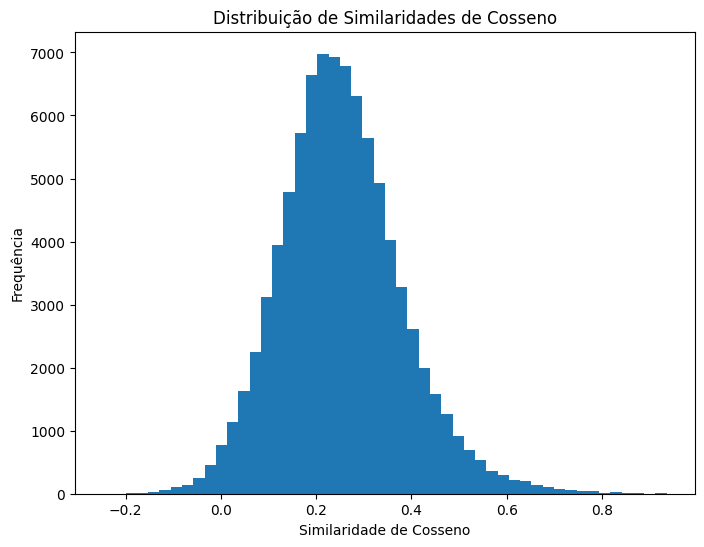

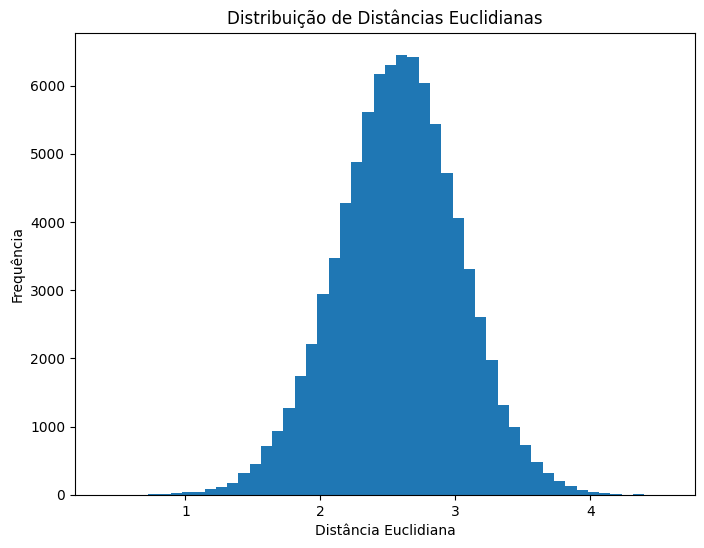

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist, squareform

# Calcular a similaridade de cosseno
cosine_sim_matrix = cosine_similarity(pain_protein_embeddings)

# Pegar apenas a metade superior da matriz, excluindo a diagonal
triu_indices = np.triu_indices_from(cosine_sim_matrix, k=1)
cosine_sim_values = cosine_sim_matrix[triu_indices]

# Plotar histograma das similaridades de cosseno não redundantes
plt.figure(figsize=(8, 6))
plt.hist(cosine_sim_values, bins=50)
plt.title("Distribuição de Similaridades de Cosseno")
plt.xlabel("Similaridade de Cosseno")
plt.ylabel("Frequência")
plt.show()

# Calcular a distância euclidiana
euclidean_dist_matrix = squareform(pdist(pain_protein_embeddings, metric='euclidean'))


# Pegar apenas a metade superior da matriz, excluindo a diagonal
triu_indices = np.triu_indices_from(euclidean_dist_matrix, k=1)
euclidean_dist_values = euclidean_dist_matrix[triu_indices]

# Plotar histograma das distâncias euclidianas não redundantes
plt.figure(figsize=(8, 6))
plt.hist(euclidean_dist_values, bins=50)
plt.title("Distribuição de Distâncias Euclidianas")
plt.xlabel("Distância Euclidiana")
plt.ylabel("Frequência")
plt.show()


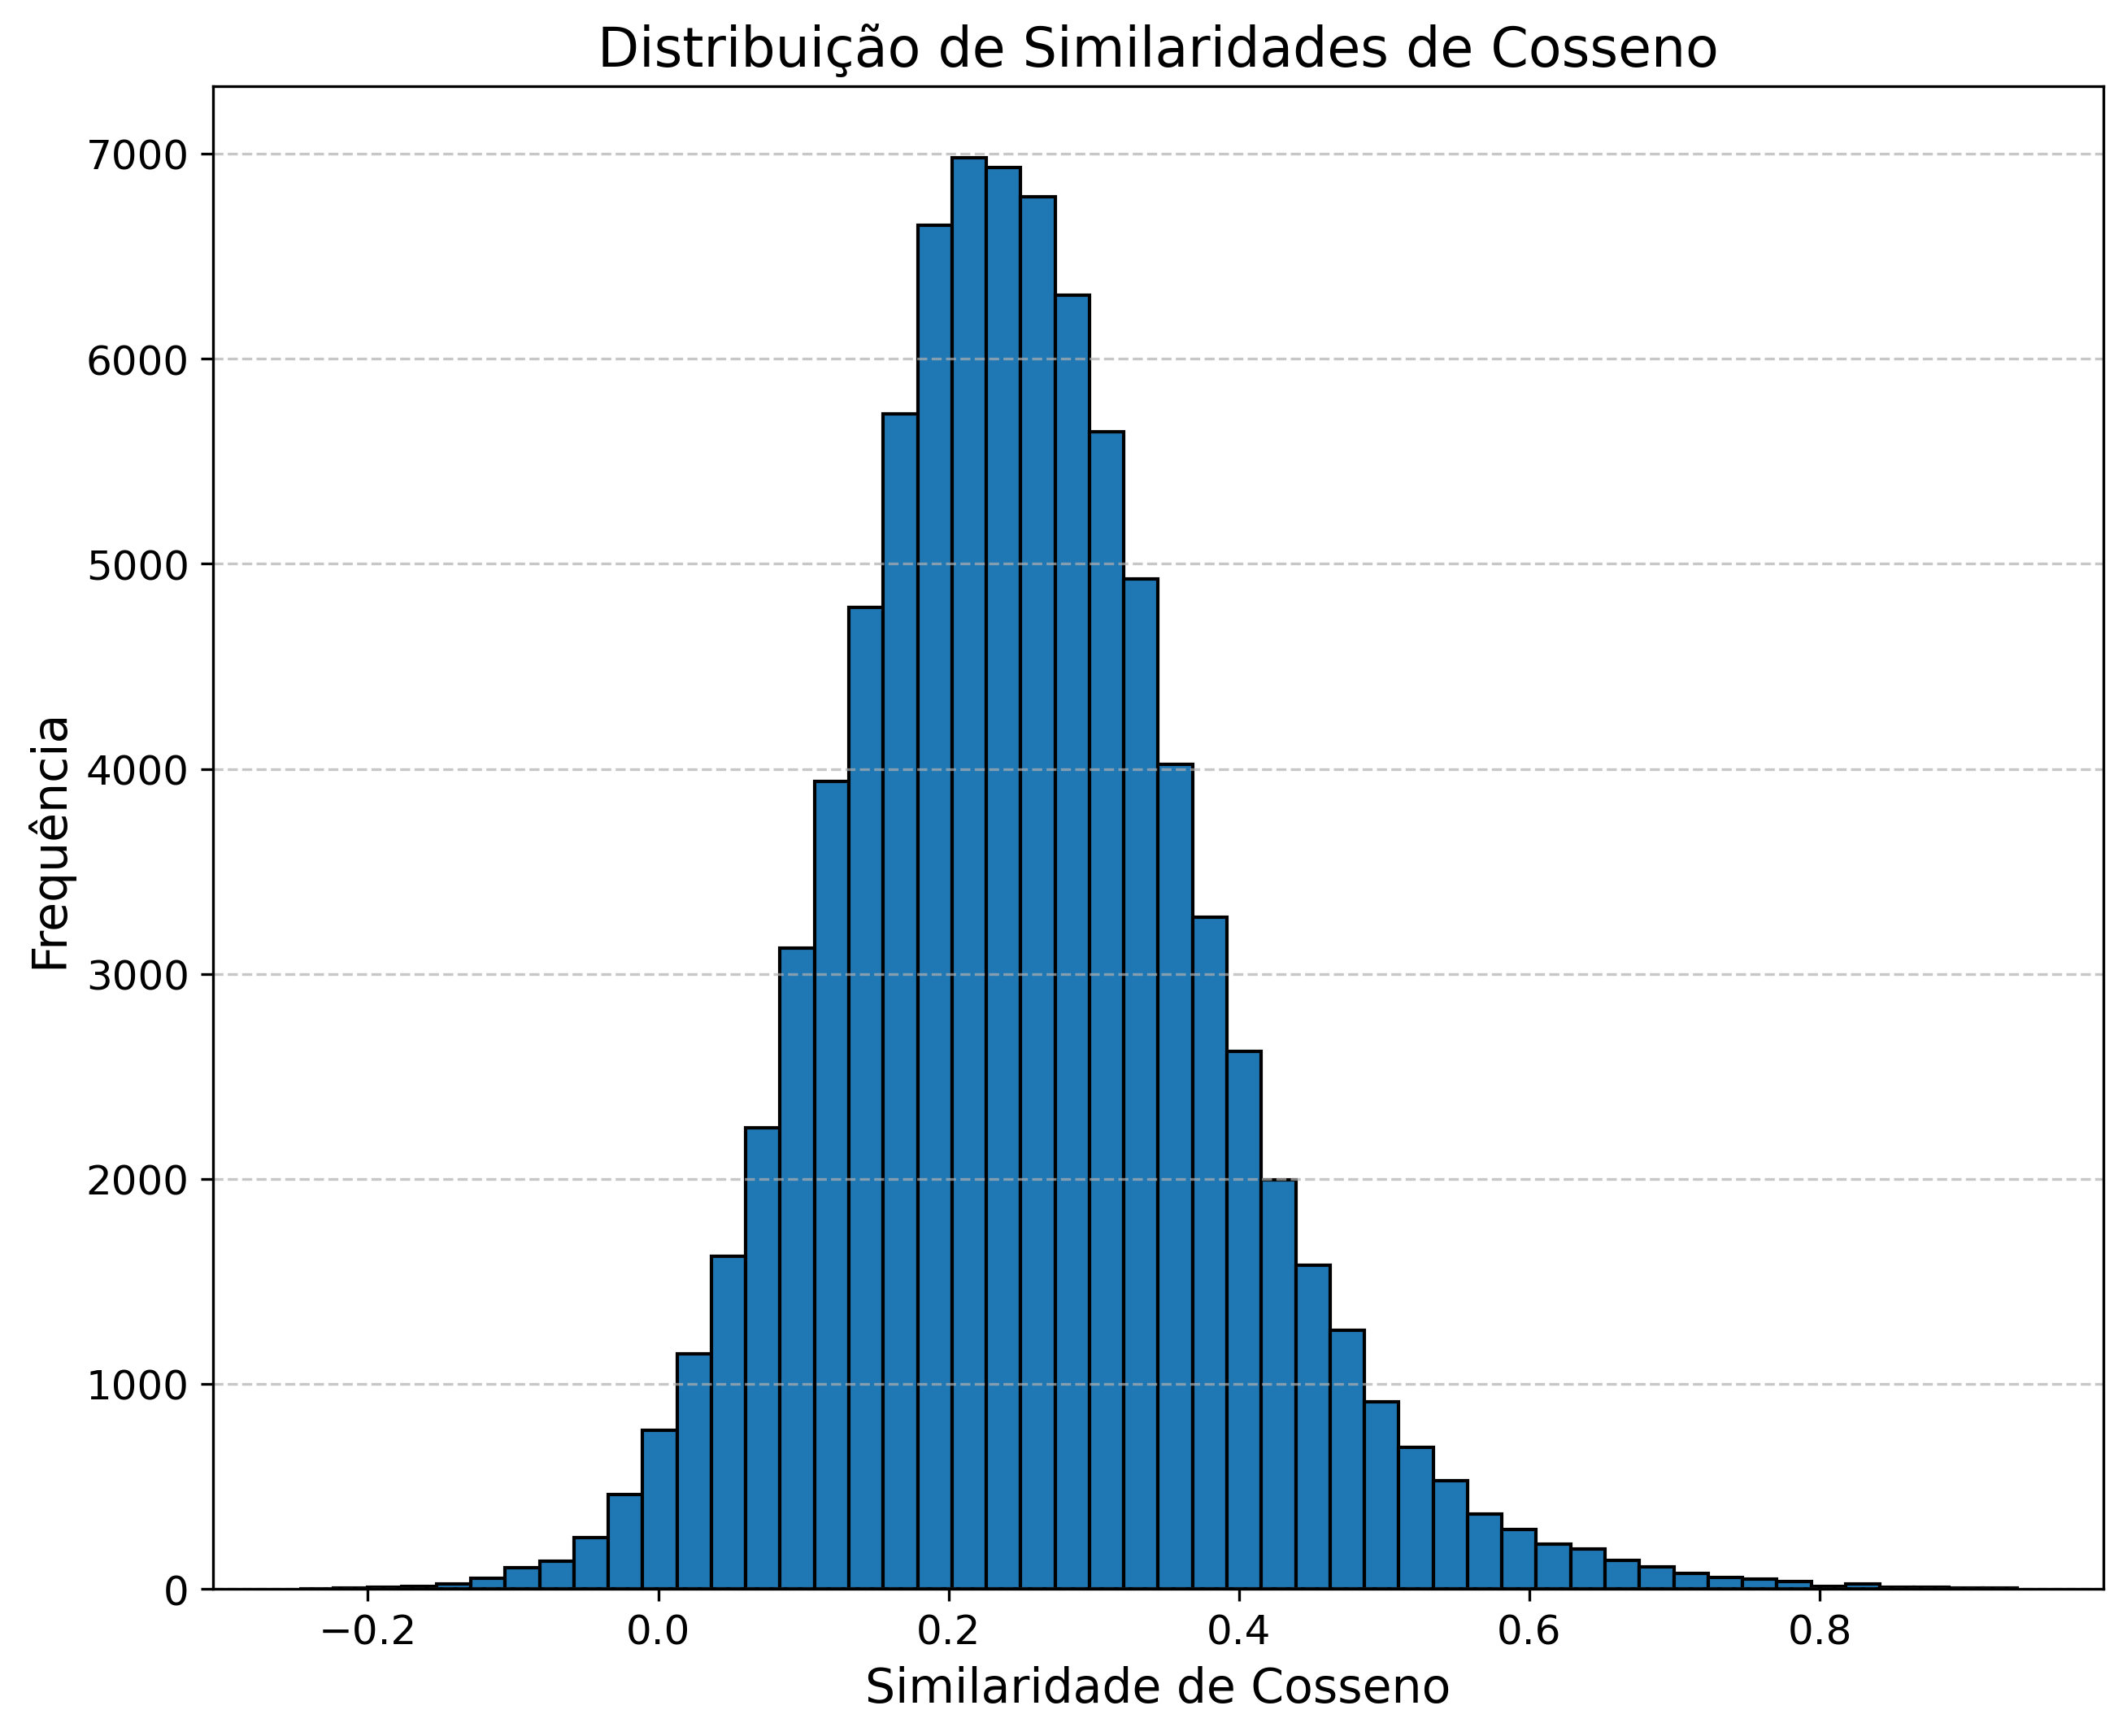

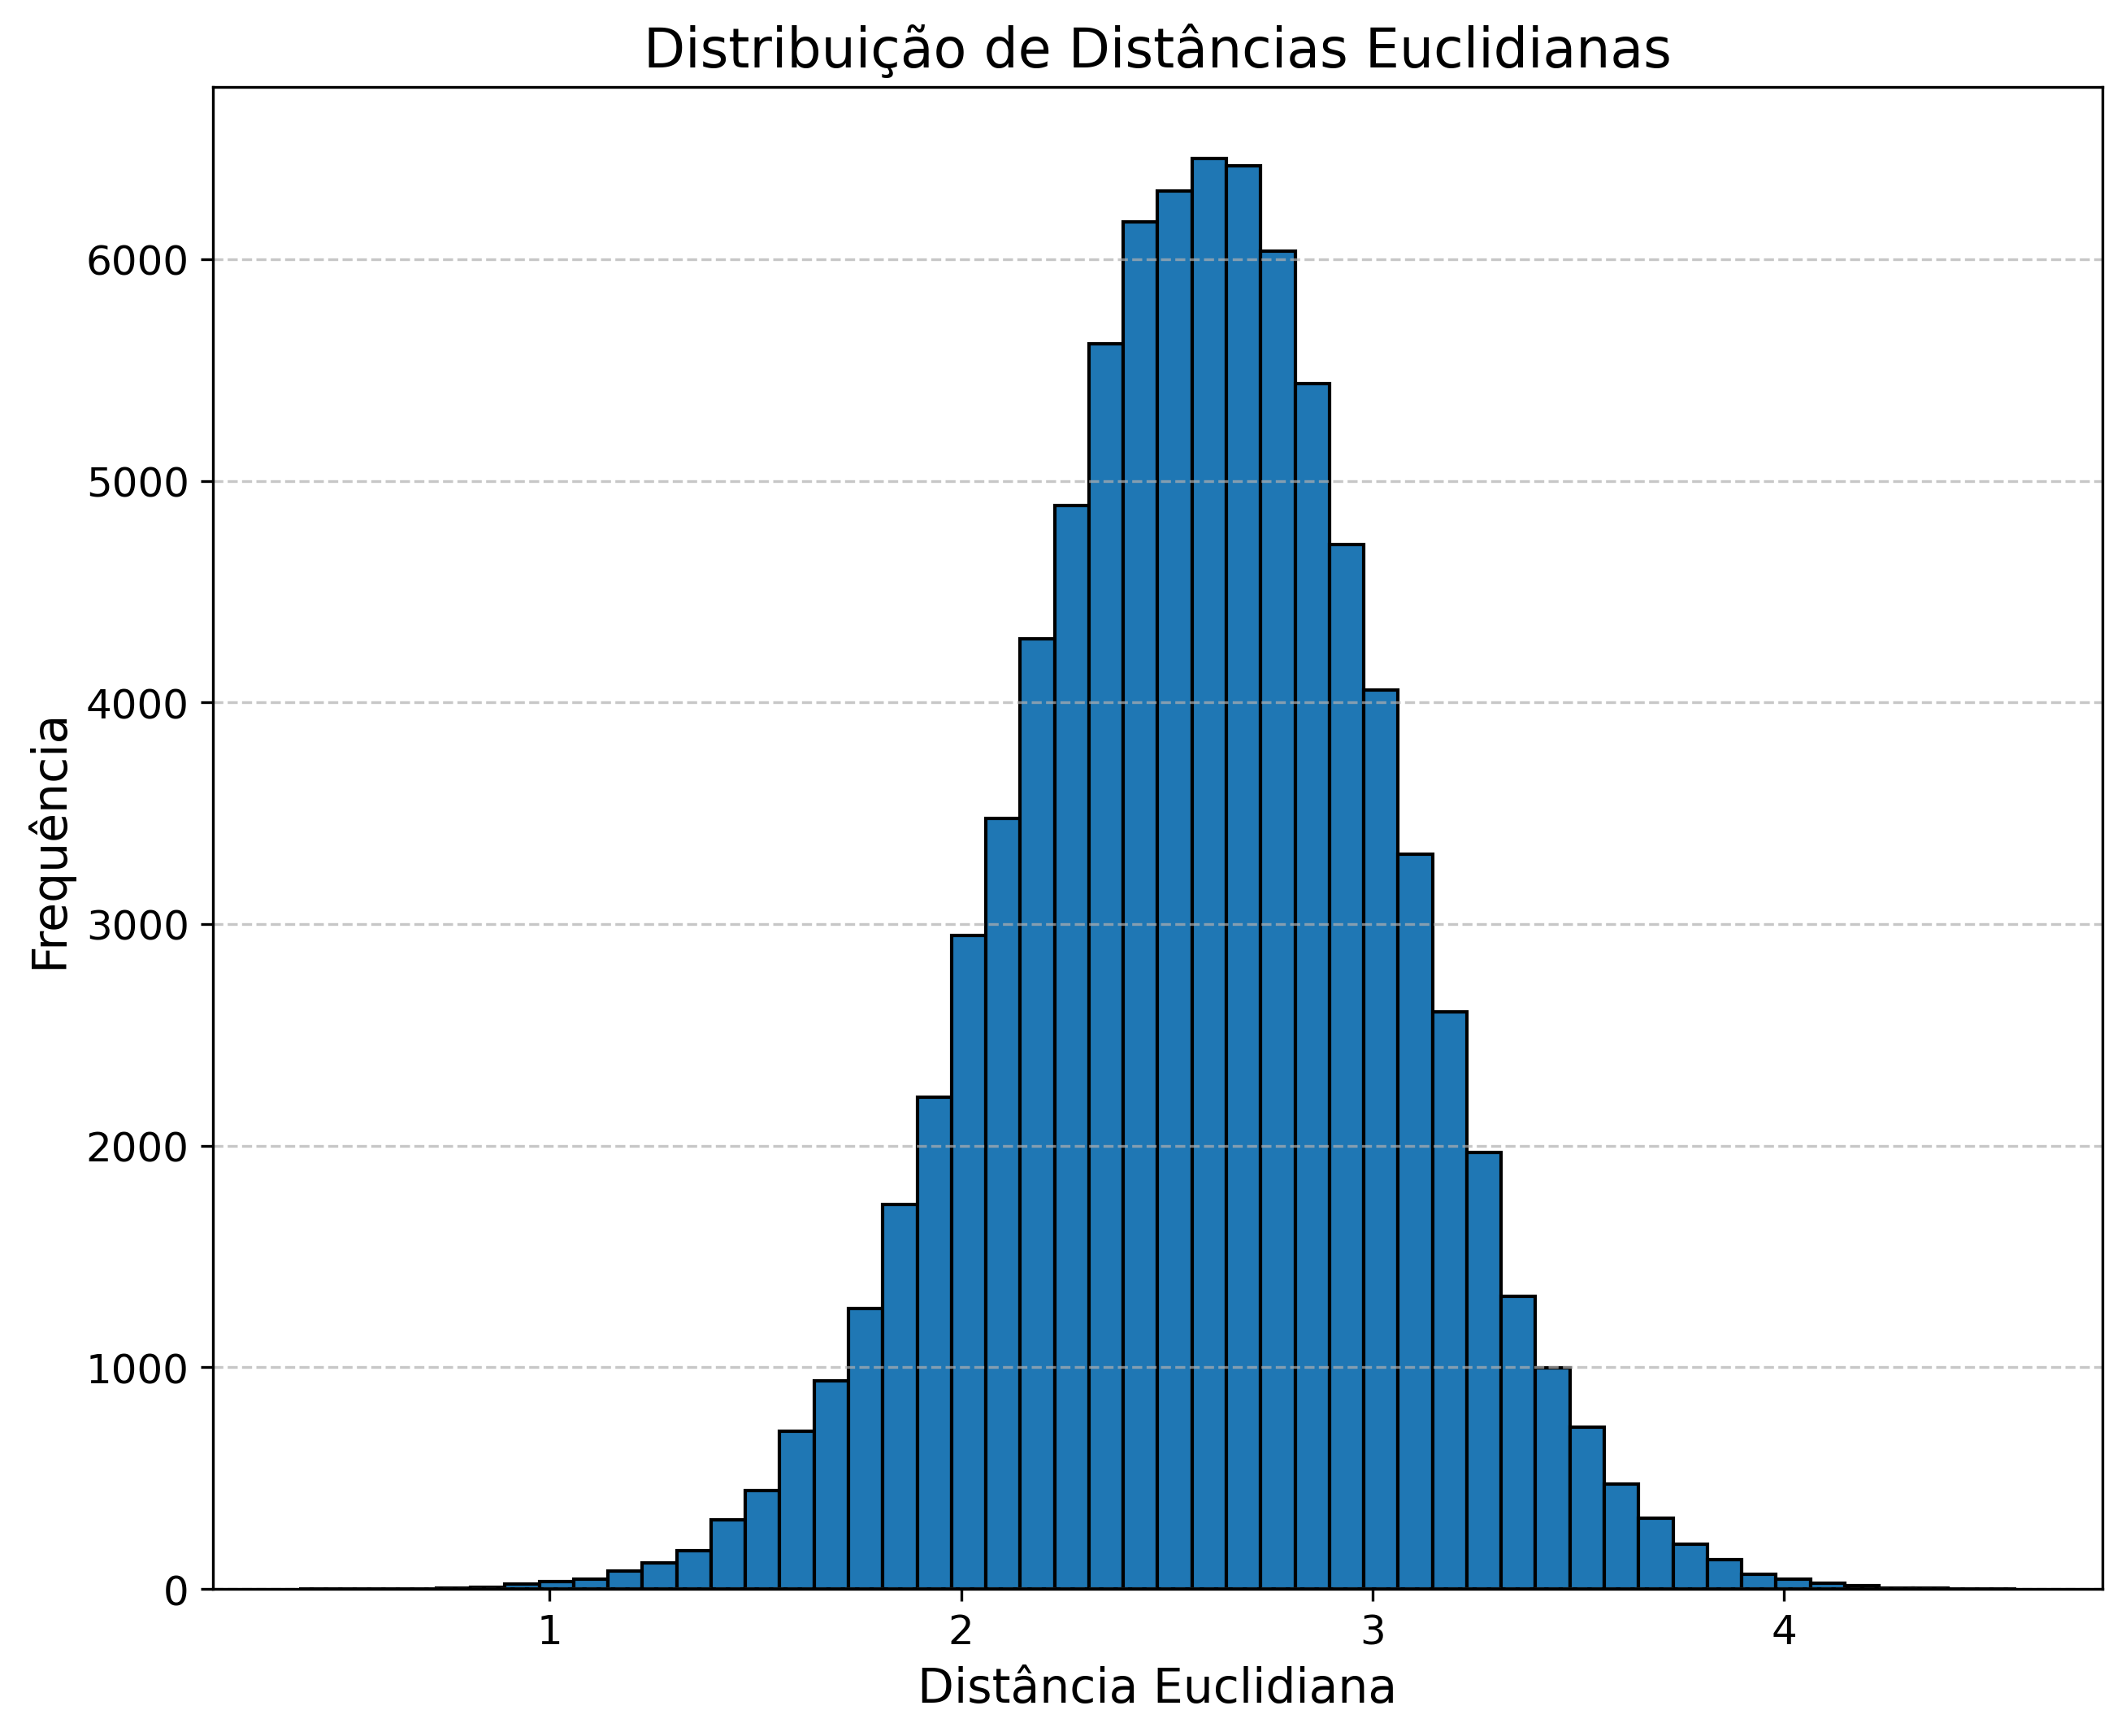

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist, squareform

# Calcular a similaridade de cosseno
cosine_sim_matrix = cosine_similarity(pain_protein_embeddings)

# Pegar apenas a metade superior da matriz, excluindo a diagonal
triu_indices = np.triu_indices_from(cosine_sim_matrix, k=1)
cosine_sim_values = cosine_sim_matrix[triu_indices]

# Plotar histograma das similaridades de cosseno não redundantes
plt.figure(figsize=(10, 8), dpi=300)
plt.hist(cosine_sim_values, bins=50, edgecolor='black')
plt.title("Distribuição de Similaridades de Cosseno", fontsize=16)
plt.xlabel("Similaridade de Cosseno", fontsize=14)
plt.ylabel("Frequência", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('/content/drive/MyDrive/USP/Projeto Mestrado/distribuicao_similaridade_cosseno.png')
plt.show()

# Calcular a distância euclidiana
euclidean_dist_matrix = squareform(pdist(pain_protein_embeddings, metric='euclidean'))

# Pegar apenas a metade superior da matriz, excluindo a diagonal
triu_indices = np.triu_indices_from(euclidean_dist_matrix, k=1)
euclidean_dist_values = euclidean_dist_matrix[triu_indices]

# Plotar histograma das distâncias euclidianas não redundantes
plt.figure(figsize=(10, 8), dpi=300)
plt.hist(euclidean_dist_values, bins=50, edgecolor='black')
plt.title("Distribuição de Distâncias Euclidianas", fontsize=16)
plt.xlabel("Distância Euclidiana", fontsize=14)
plt.ylabel("Frequência", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('/content/drive/MyDrive/USP/Projeto Mestrado/distribuicao_distancia_euclidiana.png')
plt.show()


In [ ]:
euclidean_dist_filtered_df

,Protein1,Protein2,Euclidean_Distance,Symbol1,Symbol2
115,2099,2100,0.390188,ESR1,ESR2


In [ ]:
cosine_sim_counts

,Protein,Similarity_Count,Symbol
0,2099,67.0,ESR1
1,4914,60.0,NTRK1
2,2100,57.0,ESR2
3,23197,55.0,FAF2
4,64116,55.0,SLC39A8
...,...,...,...
410,85301,1.0,COL27A1
411,85442,1.0,KNDC1
412,5173,1.0,PDYN
413,221692,1.0,PHACTR1


In [ ]:
euclidean_dist_counts

,Protein,Distance_Count,Symbol
0,2099,1.0,ESR1
1,2100,1.0,ESR2


In [ ]:
# Manually inputting the data
data = {
    'Value': [67, 60, 57, 55, 55, 49, 48, 48, 47, 47, 46, 46, 44, 44, 44, 44, 43, 41, 41, 40, 38, 38, 38, 37, 37, 37, 37],
    'Gene': ['ESR1', 'NTRK1', 'ESR2', 'FAF2', 'SLC39A8', 'ADRB2', 'TGFA', 'TFRC', 'SIGMAR1', 'ATP2C1', 'HTR3A', 'ARRB2',
             'ABCC4', 'HTR2C', 'EDNRA', 'ACE2', 'FAAH', 'LRIG3', 'LEMD2', 'NTSR1', 'SLC11A2', 'MAOB', 'CHRNA1', 'SLC27A6',
             'SLC10A7', 'DRD2', 'CYP19A1']
}

df = pd.DataFrame(data)

In [ ]:
# Generating a list from 1 to 320 with a step of 10
number_list = list(range(1, 19000, 1000))
len(number_list)


19

In [ ]:
import pandas as pd

# Dados fornecidos pelo usuário
data = {
    'Value': [67, 60, 57, 55, 55, 49, 48, 48, 47, 47, 46, 46, 44, 44, 44, 44, 43, 41, 41, 40, 38, 38, 38, 37, 37, 37, 37],
    'Gene': ['ESR1', 'NTRK1', 'ESR2', 'FAF2', 'SLC39A8', 'ADRB2', 'TGFA', 'TFRC', 'SIGMAR1', 'ATP2C1', 'HTR3A', 'ARRB2',
             'ABCC4', 'HTR2C', 'EDNRA', 'ACE2', 'FAAH', 'LRIG3', 'LEMD2', 'NTSR1', 'SLC11A2', 'MAOB', 'CHRNA1', 'SLC27A6',
             'SLC10A7', 'DRD2', 'CYP19A1']
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Ordenando o DataFrame do menor ao maior
df_sorted = df.sort_values(by='Value')

# Eliminando valores menores que 40
df_filtered = df_sorted[df_sorted['Value'] >= 40]


df = df_filtered


In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Manually inputting the data



number_list = list(range(1, 2700, 100))
# Plotting the data with jittered x-values and color based on value
fig = go.Figure(data=[go.Scatter(
    x=number_list,
    y=number_list,  # Constant y-value
    text=df.apply(lambda row: f"{row['Gene']}<br>{row['Value']}", axis=1),
    mode='markers+text',
    textposition='top center',
    marker=dict(
        color=df['Value'],
        size=df['Value'],
        colorscale='Inferno',
        showscale=True
    )
)])

fig.update_layout(
    title="Scatter Plot of Gene Values",
    xaxis=dict(showticklabels=False, title=""),
    yaxis=dict(showticklabels=False, title="")
)
fig.update_layout(height=600)
#fig.update_layout(width=2500)
fig.show()



In [ ]:
import plotly.graph_objs as go
import pandas as pd

# Assuming 'df' is the DataFrame containing your data
# And 'number_list' is the list you want to use for x and y

# Your data
df = pd.DataFrame({
    'Gene': ['NTSR1', 'LEMD2', 'LRIG3', 'FAAH', 'ACE2', 'EDNRA', 'HTR2C', 'ABCC4', 'ARRB2', 'HTR3A', 'ATP2C1', 'SIGMAR1', 'TFRC', 'TGFA', 'ADRB2', 'SLC39A8', 'FAF2', 'ESR2', 'NTRK1', 'ESR1'],
    'Value': [40, 41, 41, 43, 44, 44, 44, 44, 46, 46, 47, 47, 48, 48, 49, 55, 55, 57, 60, 67]
})
number_list = list(range(1, 22, 1))
number_list2 = list(range(1, 35, 1))
# Plotting the data with jittered x-values and color based on value
fig = go.Figure(data=[go.Scatter(
    x=number_list,
    y=number_list2,  # Constant y-value
    text=df.apply(lambda row: f"{row['Gene']}<br>{row['Value']}", axis=1),
    mode='markers+text',
    textposition='top center',
    marker=dict(
        color=df['Value'],
        size=df['Value'],
        colorscale='Inferno',
        showscale=True
    )
)])

fig.update_layout(
    title="Scatter Plot of Gene Values",
    xaxis=dict(showticklabels=False, title=""),
    yaxis=dict(showticklabels=False, title="")
)
fig.update_layout(height=900)
fig.show()


In [ ]:
df

,Value,Gene,Separation,Jittered_Index
0,67,ESR1,250.000000,250.000000
1,60,NTRK1,239.552239,489.552239
2,57,ESR2,235.074627,724.626866
3,55,FAF2,232.089552,956.716418
4,55,SLC39A8,232.089552,1188.805970
5,49,ADRB2,223.134328,1411.940299
6,48,TGFA,221.641791,1633.582090
7,48,TFRC,221.641791,1855.223881
8,47,SIGMAR1,220.149254,2075.373134
9,47,ATP2C1,220.149254,2295.522388


In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Manually inputting the data
data = {
    'Value': [67, 60, 57, 55, 55, 49, 48, 48, 47, 47, 46, 46, 44, 44, 44, 44, 43, 41, 41, 40, 38, 38, 38, 37, 37, 37, 37],
    'Gene': ['ESR1', 'NTRK1', 'ESR2', 'FAF2', 'SLC39A8', 'ADRB2', 'TGFA', 'TFRC', 'SIGMAR1', 'ATP2C1', 'HTR3A', 'ARRB2',
             'ABCC4', 'HTR2C', 'EDNRA', 'ACE2', 'FAAH', 'LRIG3', 'LEMD2', 'NTSR1', 'SLC11A2', 'MAOB', 'CHRNA1', 'SLC27A6',
             'SLC10A7', 'DRD2', 'CYP19A1']
}

df = pd.DataFrame(data)

# Calculate a separation distance based on the size to prevent overlap
df['Separation'] = df['Value'] / max(df['Value']) * 2.5  # Scale separation factor appropriately
df['Jittered_Index'] = np.cumsum(df['Separation'])

# Plotting the data with jittered x-values and color based on value
fig = go.Figure(data=[go.Scatter(
    x=[67, 60, 57, 55, 55, 49, 48, 48, 47, 47, 46, 46, 44, 44, 44, 44, 43, 41, 41, 40, 38, 38, 38, 37, 37, 37, 37],
    y=[0]*len(df),  # Constant y-value
    text=df.apply(lambda row: f"{row['Gene']}<br>{row['Value']}", axis=1),
    mode='markers+text',
    textposition="middle center",
    marker=dict(
        color=df['Value'],
        size=df['Value'],
        colorscale='Viridis',
        showscale=True
    )
)])

fig.update_layout(
    title="Scatter Plot of Gene Values",
    xaxis=dict(showticklabels=False, title=""),
    yaxis=dict(showticklabels=False, title="")
)

fig.show()






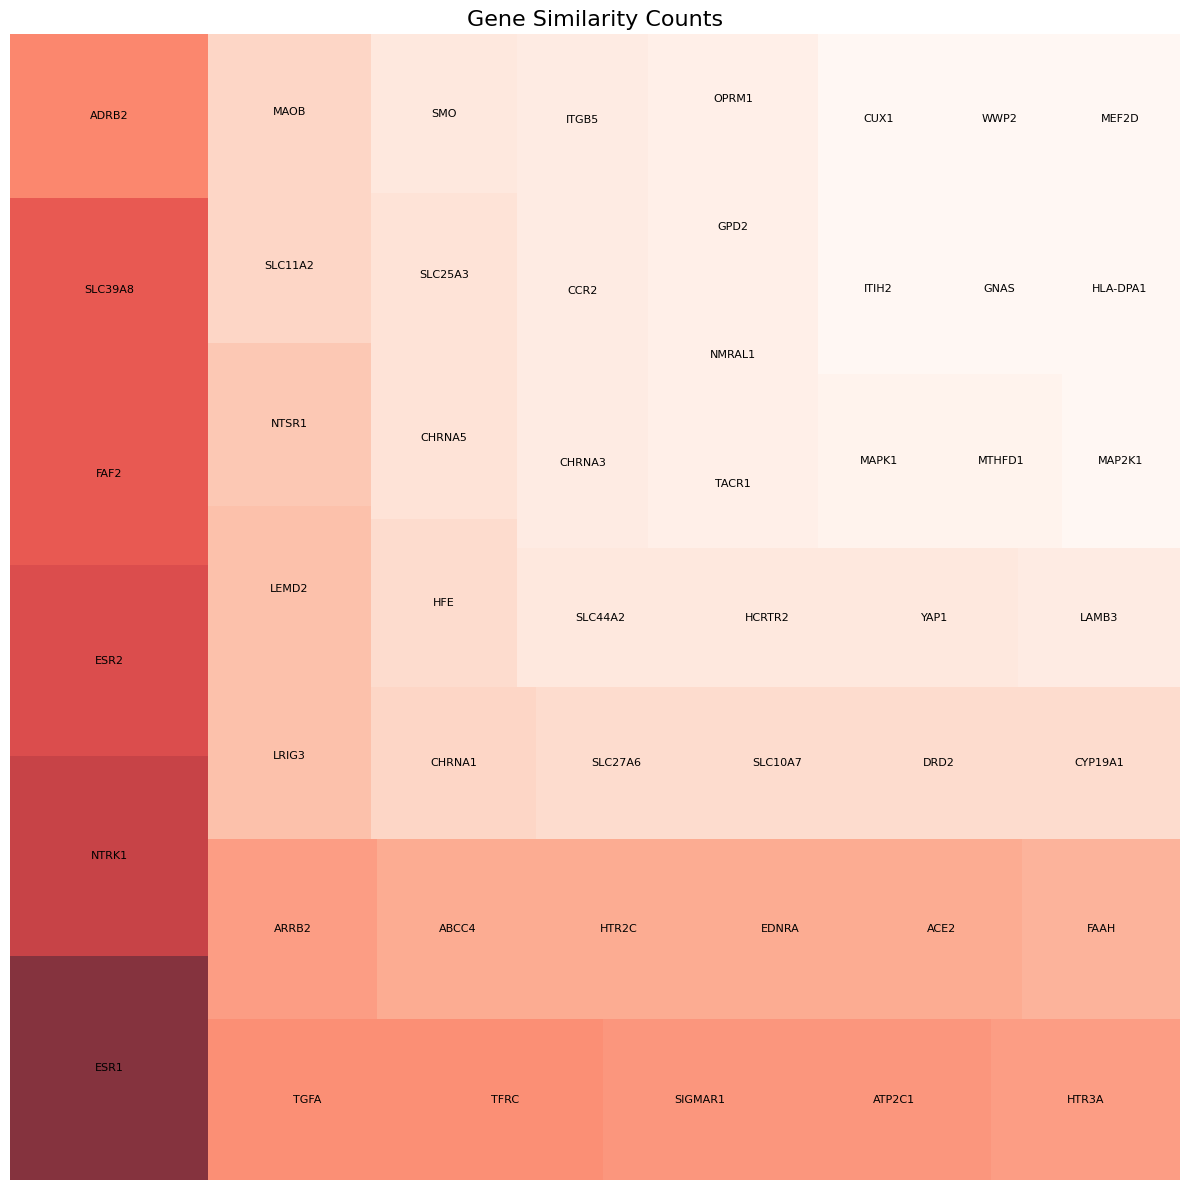

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Supondo que 'df' seja o DataFrame carregado
# Filtrar os dados para Similarity_Count maior que 20
df_filtered = cosine_sim_counts[cosine_sim_counts['Similarity_Count'] > 30]

# Normalize the Similarity_Count for color mapping
norm = plt.Normalize(df_filtered['Similarity_Count'].min(), df_filtered['Similarity_Count'].max())
colors = plt.cm.Reds(norm(df_filtered['Similarity_Count']))
#colors = plt.cm.Reds(df_filtered['Similarity_Count'])
# Normalize the size of the circles
sizes = df_filtered['Similarity_Count']

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 12))

# Plot using squarify
squarify.plot(sizes=sizes, label=df_filtered['Symbol'], color=colors, alpha=0.8, text_kwargs={'fontsize': 8})

# Customize plot
ax.set_title('Gene Similarity Counts', fontsize=16)
ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Protein           12 non-null     object 
 1   Similarity_Count  12 non-null     float64
 2   Symbol            12 non-null     object 
dtypes: float64(1), object(2)
memory usage: 384.0+ bytes


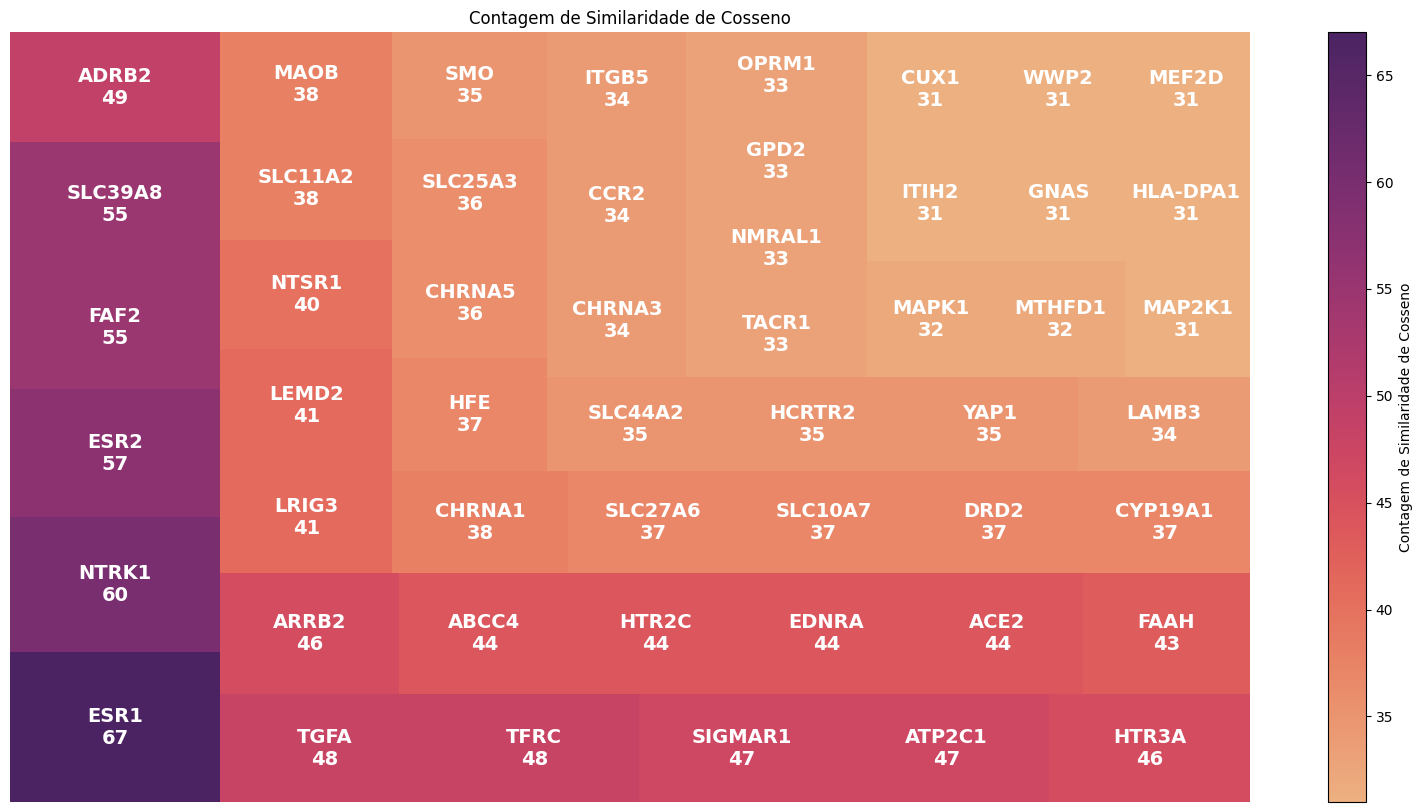

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
import matplotlib.colors as mcolors


# Preparar rótulos
labels = [f'{symbol}\n{count}' for symbol, count in zip(df_filtered['Symbol'], df_filtered['Similarity_Count'].astype(int))]

# Configurar o plot
fig, ax = plt.subplots(figsize=(20, 10))

# Cria a colormap
cmap = sns.color_palette("flare", as_cmap=True)
norm = mcolors.Normalize(vmin=min(df_filtered['Similarity_Count']), vmax=max(df_filtered['Similarity_Count']))
colors = [cmap(norm(value)) for value in df_filtered['Similarity_Count']]

# Cria o gráfico de tree map
squarify.plot(sizes=df_filtered['Similarity_Count'], label=labels, text_kwargs={'color': 'white', 'fontweight': 'bold', 'fontsize':14}, color=colors, ax=ax)

plt.axis('off')
plt.title('Contagem de Similaridade de Cosseno')

# Adiciona a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Contagem de Similaridade de Cosseno')

plt.show()





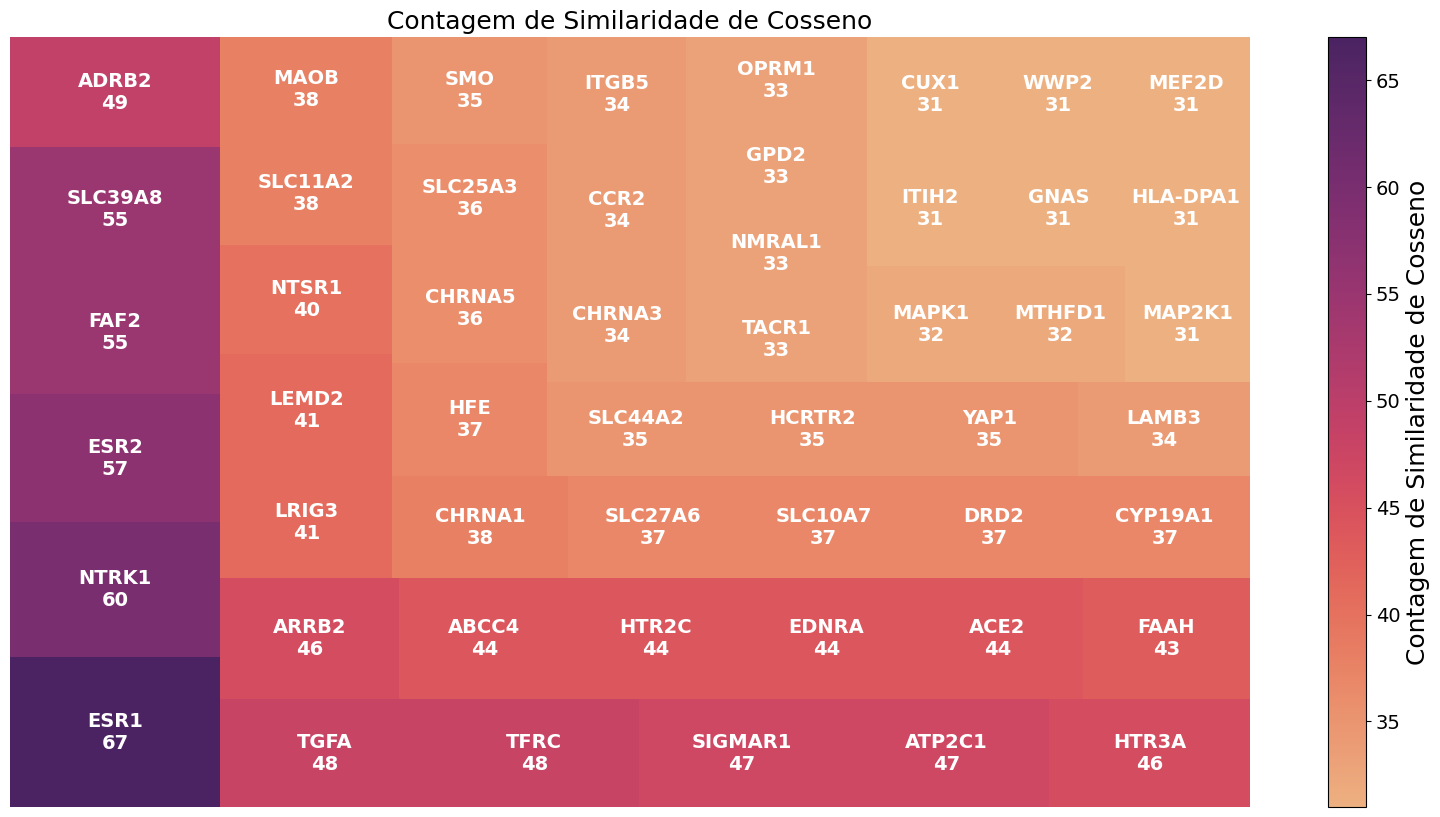

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
import matplotlib.colors as mcolors

# Assuming df_filtered is the dataframe you are using
# df_filtered = ...

# Prepare labels
labels = [f'{symbol}\n{count}' for symbol, count in zip(df_filtered['Symbol'], df_filtered['Similarity_Count'].astype(int))]

# Set up the plot
fig, ax = plt.subplots(figsize=(20, 10))

# Create the colormap
cmap = sns.color_palette("flare", as_cmap=True)
norm = mcolors.Normalize(vmin=min(df_filtered['Similarity_Count']), vmax=max(df_filtered['Similarity_Count']))
colors = [cmap(norm(value)) for value in df_filtered['Similarity_Count']]

# Create the treemap
squarify.plot(sizes=df_filtered['Similarity_Count'], label=labels, text_kwargs={'color': 'white', 'fontweight': 'bold', 'fontsize':14}, color=colors, ax=ax)

plt.axis('off')
plt.title('Contagem de Similaridade de Cosseno', fontsize=18)

# Add the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Contagem de Similaridade de Cosseno', fontsize=18)
cbar.ax.tick_params(labelsize=14)


plt.show()

